#Optimizing Deep Learning Models for Real-World Data


---

##*Dataset: UCI Forest Covertype*

1. * Importing required tools and libraries
   * Loading Dataset
   * Exploring Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
data=fetch_covtype()
X,y=data.data,data.target - 1 #-1 to shift labels to 0-based indexing .

In [7]:
print(X.shape)
print(y.shape)

(581012, 54)
(581012,)


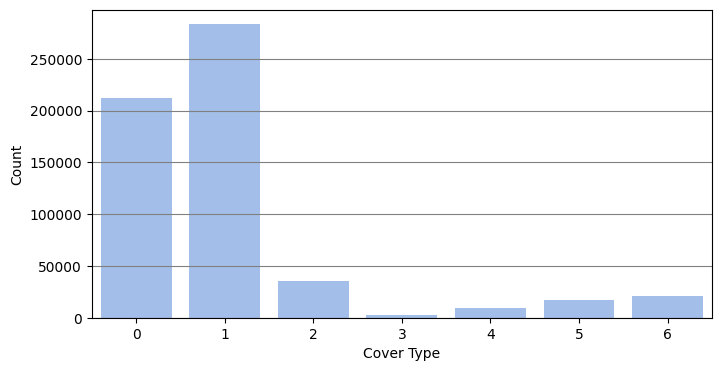

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(x=y,color='#97BBF4')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.grid(axis='y',color='grey')
plt.show()

In [6]:
print("\nClass distribution:")
print(pd.Series(y).value_counts().sort_index())


Class distribution:
0    211840
1    283301
2     35754
3      2747
4      9493
5     17367
6     20510
Name: count, dtype: int64




---


2. * Splitting dataset into test and train sets.
  * Scaling the features.
  * One_hot encoding the labels/classes.
---  

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [4]:
print(X_train.shape)
print(y_test.shape)

(464809, 54)
(116203,)


In [5]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [6]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

Define and Train a Baseline MLP Model
---

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import SGD,Adam

In [8]:
baseline_model=Sequential([Input(shape=(X_train.shape[1],)),
                           Dense(128,activation='relu'),
                           Dense(64,activation='relu'),
                           Dense(32,activation='relu'),
                           Dense(7,activation='softmax')])
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
baseline_model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [10]:
history_baseline_model=baseline_model.fit(X_train,y_train,epochs=10,
                                          validation_split=0.2,
                                          batch_size=256,
                                          verbose=1)

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7319 - loss: 0.6302 - val_accuracy: 0.8016 - val_loss: 0.4697
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8098 - loss: 0.4516 - val_accuracy: 0.8189 - val_loss: 0.4288
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8294 - loss: 0.4107 - val_accuracy: 0.8302 - val_loss: 0.4026
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8398 - loss: 0.3851 - val_accuracy: 0.8445 - val_loss: 0.3767
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8473 - loss: 0.3680 - val_accuracy: 0.8498 - val_loss: 0.3688
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8546 - loss: 0.3523 - val_accuracy: 0.8553 - val_loss: 0.3553
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8576 - loss: 0.3466 - val_accuracy: 0.8528 - val_loss: 0.3621
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8603 - loss: 0.34

In [11]:
def plot_learning_curves(history,title='Model'):
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  epochs=range(1,len(acc)+1)

  plt.figure(figsize=(10,5))

  # Accuracy Plot
  plt.subplot(1,2,1)
  plt.plot(epochs,acc,'b-',label='Training Accuracy')
  plt.plot(epochs,val_acc,'r--',label='Validation Accuracy')
  plt.title(f'{title} _ Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  #Loss Plot
  plt.subplot(1,2,2)
  plt.plot(epochs,loss,'b-',label='Training Loss')
  plt.plot(epochs,val_loss,'r--',label='Validation Loss')
  plt.title(f'{title} _ Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()



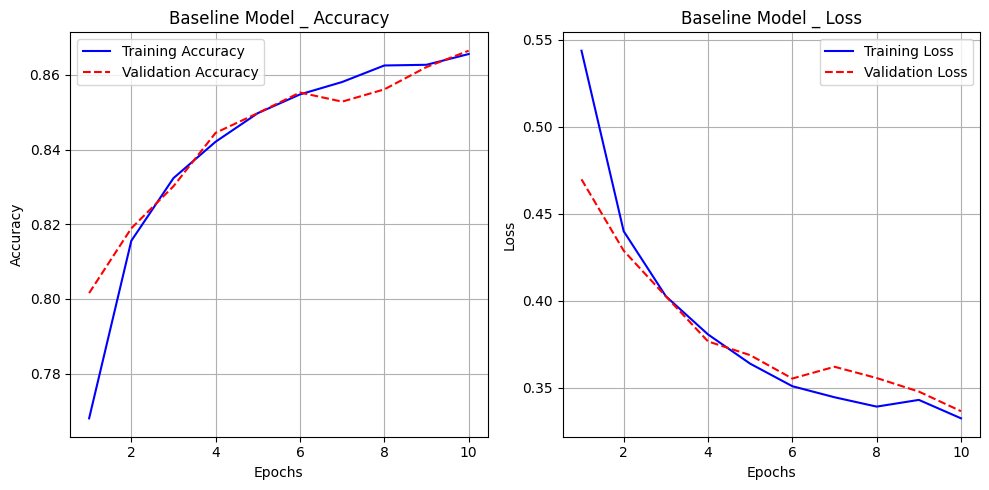

In [12]:
plot_learning_curves(history_baseline_model,title='Baseline Model')

* Both training and validation accuracy are increasing at almost the same rate, however a drop was observed in validation accuracy during epochs 8 and 9 .
* Loss is consistently decreasing for both training and validation set, the validation loss did however increased between epochs 7 and 9,thus indicating overfitting.
---

In [13]:
# Evaluation
loss_bl,acc_bl=baseline_model.evaluate(X_test,y_test)
print(f'Test Loss: {100*loss_bl:.2f}%')
print(f'Test Accuracy: {100*acc_bl:.2f}%')

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8668 - loss: 0.3355
Test Loss: 33.61%
Test Accuracy: 86.64%


* 86% Accuracy is a good performance, will further aim to imporve it through regularization and optimizing techniques.

---
**TASKS**

---
## 1. Neural Network Architecture

**Deeper or wider configurations.**


In [14]:
Deep_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(128,activation='relu'),
                     Dense(128,activation='relu'),
                     Dense(64,activation='relu'),
                     Dense(64,activation='relu'),
                     Dense(32,activation='relu'),
                     Dense(7,activation='softmax')])
Deep_mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,279 (149.53 KB)

 Trainable params: 38,279 (149.53 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
Deep_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history_deep_mlp=Deep_mlp.fit(X_train,y_train,epochs=10,batch_size=256,
                              validation_split=0.2,verbose=1)

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7315 - loss: 0.6310 - val_accuracy: 0.7971 - val_loss: 0.4846
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8147 - loss: 0.4442 - val_accuracy: 0.8303 - val_loss: 0.4148
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8328 - loss: 0.4102 - val_accuracy: 0.8438 - val_loss: 0.3845
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8505 - loss: 0.3672 - val_accuracy: 0.8488 - val_loss: 0.3656
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8594 - loss: 0.3456 - val_accuracy: 0.8539 - val_loss: 0.3769
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8617 - loss: 0.3492 - val_accuracy: 0.8675 - val_loss: 0.3310
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8690 - loss: 0.3291 - val_accuracy: 0.8721 - val_loss: 0.3196
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8754 - loss: 0.3

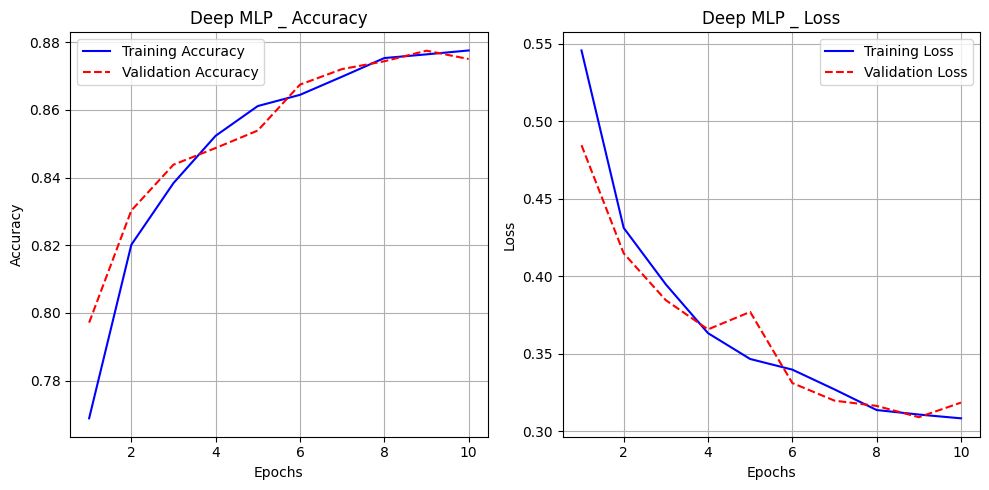

In [17]:
plot_learning_curves(history_deep_mlp,title='Deep MLP')

---
* 	Experiment with different activation functions (e.g., ReLU, LeakyReLU, SELU).

**LeakyReLU Version:**

In [18]:
from tensorflow.keras.layers import LeakyReLU

leaky_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                            Dense(128,activation=LeakyReLU(alpha=0.01)),
                      Dense(64,activation=LeakyReLU(alpha=0.01)),
                      Dense(32,activation=LeakyReLU(alpha=0.01)),
                      Dense(7,activation='softmax')])

leaky_mlp.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
leaky_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
history_leaky_mlp=leaky_mlp.fit(X_train,y_train,epochs=10,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7344 - loss: 0.6200 - val_accuracy: 0.7934 - val_loss: 0.4953
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8082 - loss: 0.4576 - val_accuracy: 0.8277 - val_loss: 0.4177
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8291 - loss: 0.4127 - val_accuracy: 0.8367 - val_loss: 0.3945
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8421 - loss: 0.3844 - val_accuracy: 0.8347 - val_loss: 0.3942
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8517 - loss: 0.3619 - val_accuracy: 0.8478 - val_loss: 0.3636
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8600 - loss: 0.3441 - val_accuracy: 0.8577 - val_loss: 0.3563
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8610 - loss: 0.3398 - val_accuracy: 0.8663 - val_loss: 0.3295
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8671 - loss: 0.330

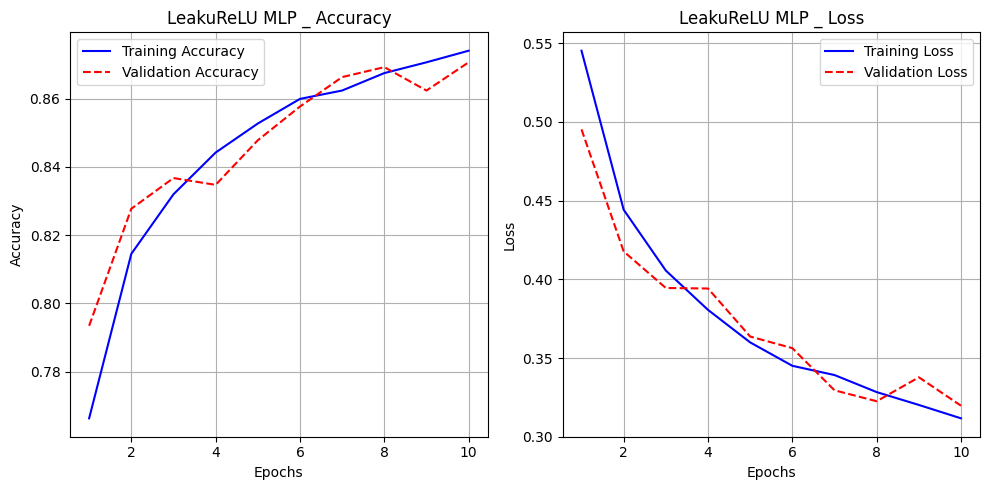

In [21]:
plot_learning_curves(history_leaky_mlp,title='LeakuReLU MLP')

**SELU Version**

In [22]:
from tensorflow.keras.initializers import lecun_normal
from tensorflow.keras.layers import AlphaDropout


SELU_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(128,activation='selu',kernel_initializer=lecun_normal()),
                     AlphaDropout(0.1),
                     Dense(64,activation='selu',kernel_initializer=lecun_normal()),
                     AlphaDropout(0.1),
                     Dense(32,activation='selu',kernel_initializer=lecun_normal()),
                     AlphaDropout(0.1),
                     Dense(7,activation='softmax')])
SELU_mlp.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout (AlphaDropout)    │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_1 (AlphaDropout)  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_2 (AlphaDropout)  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
SELU_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history_SELU_mlp=SELU_mlp.fit(X_train,y_train,epochs=10,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6989 - loss: 0.7153 - val_accuracy: 0.7598 - val_loss: 0.5806
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7524 - loss: 0.5785 - val_accuracy: 0.7787 - val_loss: 0.5770
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7653 - loss: 0.5539 - val_accuracy: 0.7934 - val_loss: 0.5089
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7780 - loss: 0.5279 - val_accuracy: 0.8074 - val_loss: 0.5036
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7850 - loss: 0.5136 - val_accuracy: 0.8105 - val_loss: 0.4630
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7901 - loss: 0.5010 - val_accuracy: 0.8188 - val_loss: 0.4536
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7905 - loss: 0.5055 - val_accuracy: 0.8250 - val_loss: 0.4450
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7977 - loss: 0.4

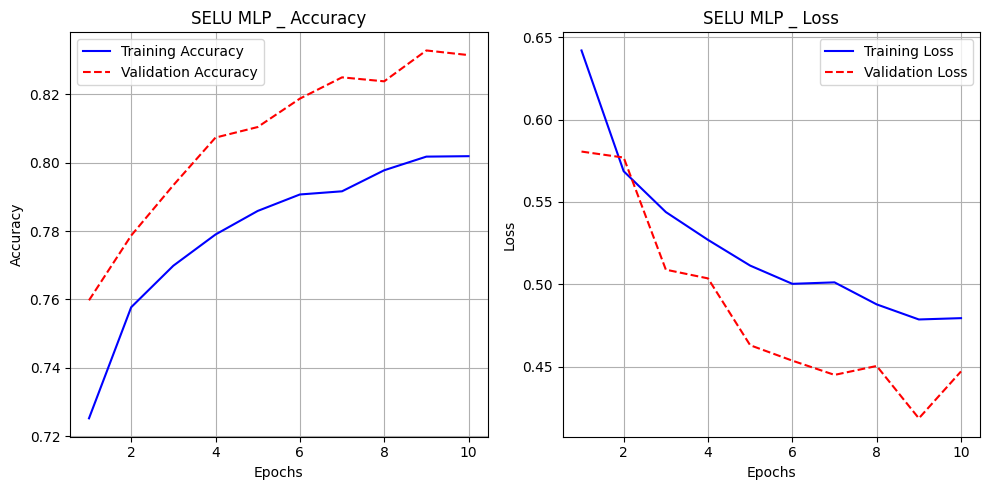

In [29]:
plot_learning_curves(history_SELU_mlp,title='SELU MLP')

**Batch Normalization**

In [67]:
from tensorflow.keras.layers import BatchNormalization

BN_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                   Dense(128,activation='relu'),
                   BatchNormalization(),
                   Dense(64,activation='relu'),
                   BatchNormalization(),
                   Dense(32,activation='relu'),
                   BatchNormalization(),
                   Dense(7,activation='softmax')])
BN_mlp.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,503 (72.28 KB)

 Trainable params: 18,055 (70.53 KB)

 Non-trainable params: 448 (1.75 KB)

In [68]:
BN_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
history_BN_mlp=BN_mlp.fit(X_train,y_train,epochs=10,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7435 - loss: 0.6308 - val_accuracy: 0.8025 - val_loss: 0.4635
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8208 - loss: 0.4263 - val_accuracy: 0.8440 - val_loss: 0.3783
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8423 - loss: 0.3791 - val_accuracy: 0.8571 - val_loss: 0.3458
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8544 - loss: 0.3491 - val_accuracy: 0.8617 - val_loss: 0.3389
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8637 - loss: 0.3288 - val_accuracy: 0.8714 - val_loss: 0.3140
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8703 - loss: 0.3136 - val_accuracy: 0.8743 - val_loss: 0.3051
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8750 - loss: 0.3037 - val_accuracy: 0.8821 - val_loss: 0.2909
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8793 - loss: 0.2933

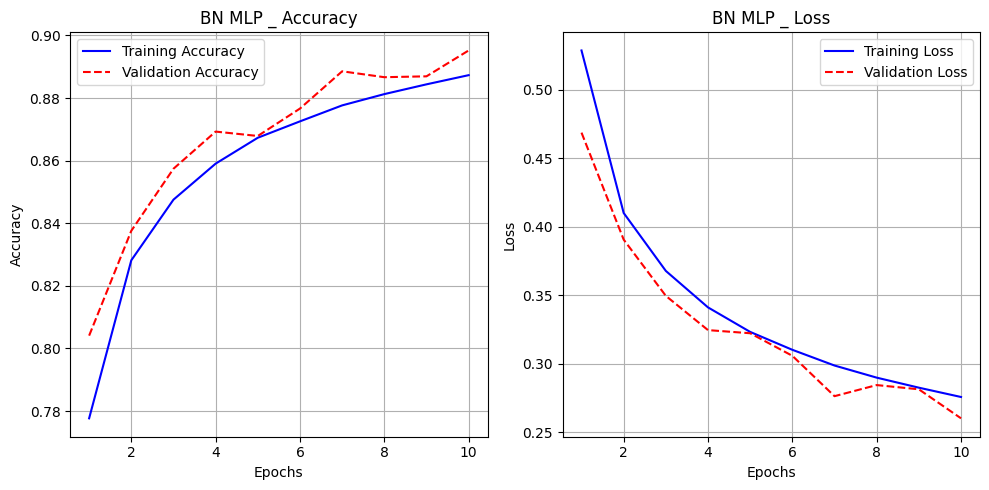

In [31]:
plot_learning_curves(history_BN_mlp,title='BN MLP')




---

***Neural Network Architecture — Design Explanation***

1.**Deeper Network** : Modified the baseline model by increasing the number of neurons(depth) and the layers(width),to encourage model to learn more complex patterns and capture more variations.

2.**LeakyReLU**: Experimented using LeakyReLU to avoid risk of dying neurons problem,alpha=0.01 is a commonly used option to provide stable gradients.

3.**SELU** : Used SELU to maintain a self_normalizing network.AlphaDropout was required to preserve the properties.

4.**Batch Normalization** : Applied Batch normalization to normalize output of each layer to avoid/reduce covariate shift.

---


##2.Regularization Techniques

**Dropout Regularization**

In [32]:
from tensorflow.keras.layers import Dropout

dropout_model=Sequential([Input(shape=(X_train.shape[1],)),
                          Dense(128,activation='relu'),
                          Dropout(0.3),
                          Dense(64,activation='relu'),
                          Dropout(0.3),
                          Dense(32,activation='relu'),
                          Dropout(0.3),
                          Dense(7,activation='softmax')])
dropout_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
dropout_model.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
history_Dropout_model=dropout_model.fit(X_train,y_train,epochs=10,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6871 - loss: 0.7535 - val_accuracy: 0.7617 - val_loss: 0.5619
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7403 - loss: 0.6291 - val_accuracy: 0.7756 - val_loss: 0.5299
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7503 - loss: 0.6081 - val_accuracy: 0.7830 - val_loss: 0.5171
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7558 - loss: 0.5977 - val_accuracy: 0.7905 - val_loss: 0.5026
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7600 - loss: 0.5895 - val_accuracy: 0.7891 - val_loss: 0.5152
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7655 - loss: 0.5800 - val_accuracy: 0.7950 - val_loss: 0.5026
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7669 - loss: 0.5762 - val_accuracy: 0.8025 - val_loss: 0.4798
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7693 - loss: 0.578

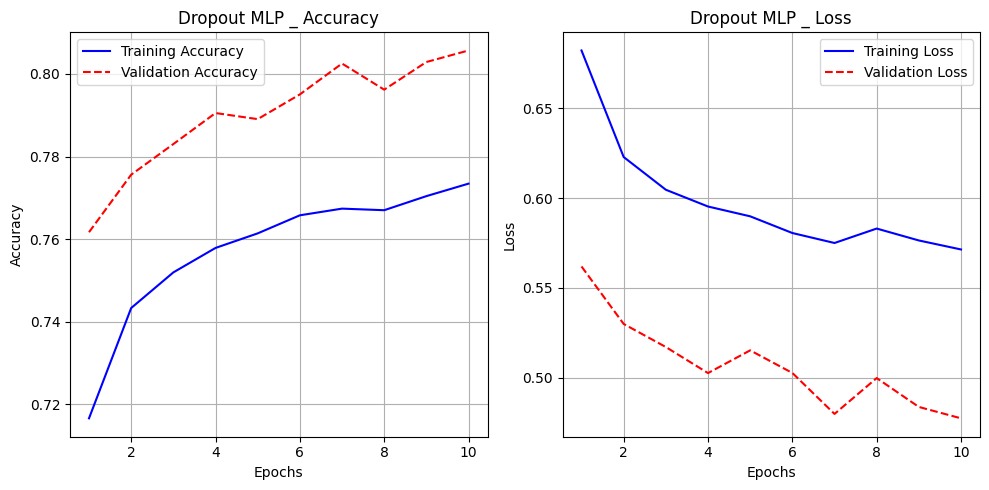

In [35]:
plot_learning_curves(history_Dropout_model,title='Dropout MLP')

**L2 Regularization**

In [36]:
from tensorflow.keras.regularizers import l2

L2_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                   Dense(128,activation='relu',kernel_regularizer=l2(0.001)),
                   Dense(64,activation='relu',kernel_regularizer=l2(0.001)),
                   Dense(32,activation='relu',kernel_regularizer=l2(0.001)),
                   Dense(7,activation='softmax')])
L2_mlp.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
L2_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
history_L2_mlp=L2_mlp.fit(X_train,y_train,epochs=10,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7238 - loss: 0.7430 - val_accuracy: 0.7606 - val_loss: 0.6213
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7604 - loss: 0.6175 - val_accuracy: 0.7666 - val_loss: 0.6120
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7702 - loss: 0.5973 - val_accuracy: 0.7729 - val_loss: 0.5923
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7719 - loss: 0.5897 - val_accuracy: 0.7749 - val_loss: 0.5903
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7768 - loss: 0.5814 - val_accuracy: 0.7761 - val_loss: 0.5765
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7781 - loss: 0.5765 - val_accuracy: 0.7661 - val_loss: 0.5919
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7771 - loss: 0.5763 - val_accuracy: 0.7747 - val_loss: 0.5772
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7790 - loss: 0.573

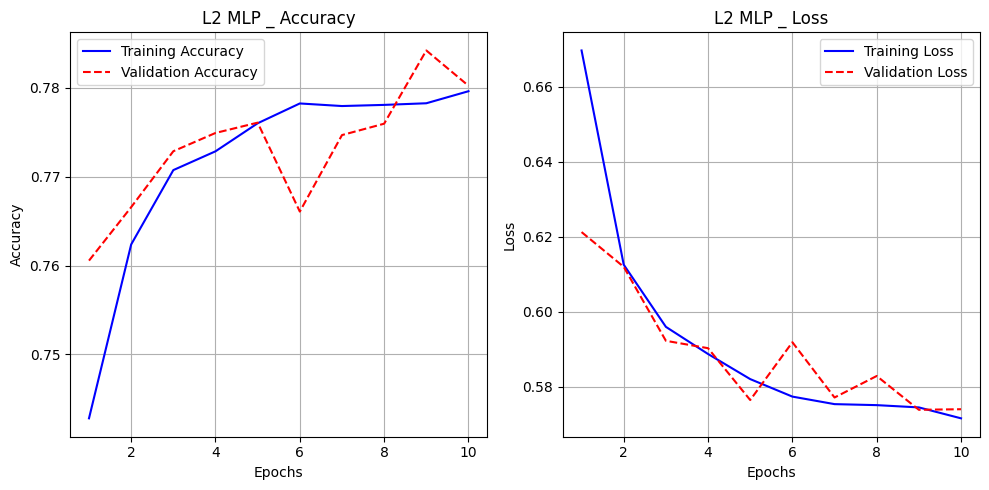

In [39]:
plot_learning_curves(history_L2_mlp,title='L2 MLP')



---

***Summary _Regularization Techniques***

1. **Dropout**The training accuracy steadily increased, while the validation accuracy  peaked around epoch 6 before slightly declining—suggesting early stopping prevented overfitting.

2. **L2 Regularization** Training Accuracy  improves steadily, showing successful learning.
Validation Accuracy trends upward with fluctuations, suggesting potential instability in generalization.



---

## 3.Optimizer and Learning Rate Strategy

* Trying multiple optimizers

**RMSprop**

In [40]:
Rms_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(128,activation='relu'),
                     Dense(64,activation='relu'),
                     Dense(32,activation='relu'),
                     Dense(7,activation='softmax')])
Rms_mlp.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
from tensorflow.keras.optimizers import RMSprop
Rms_mlp.compile(optimizer=RMSprop(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
history_Rms_mlp=Rms_mlp.fit(X_train,y_train,epochs=10,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7284 - loss: 0.6366 - val_accuracy: 0.7718 - val_loss: 0.5705
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8109 - loss: 0.4552 - val_accuracy: 0.8270 - val_loss: 0.4237
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8307 - loss: 0.4168 - val_accuracy: 0.8381 - val_loss: 0.3951
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8393 - loss: 0.3997 - val_accuracy: 0.8369 - val_loss: 0.4215
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8440 - loss: 0.3911 - val_accuracy: 0.8466 - val_loss: 0.3850
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8443 - loss: 0.3921 - val_accuracy: 0.8412 - val_loss: 0.4278
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8435 - loss: 0.4011 - val_accuracy: 0.8296 - val_loss: 0.4610
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8446 - loss: 0.4027 

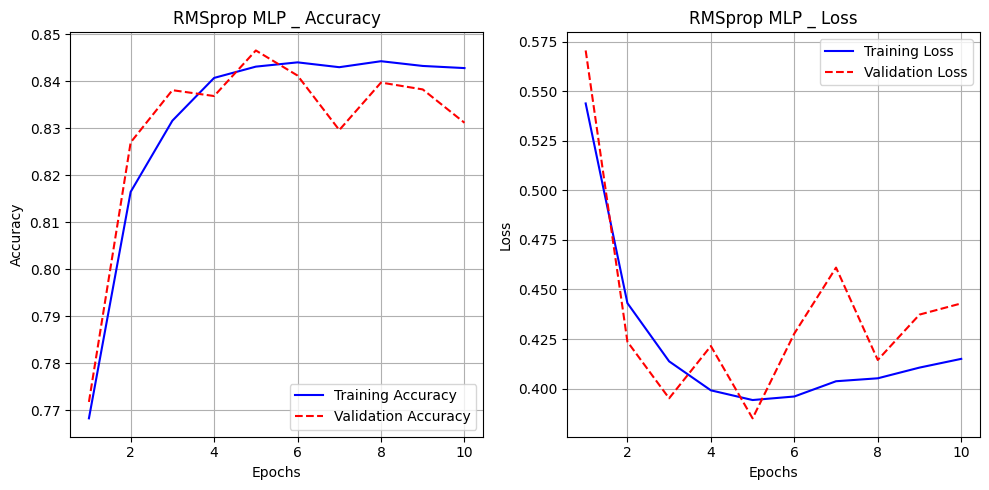

In [44]:
plot_learning_curves(history_Rms_mlp,title='RMSprop MLP')

**SGD**

In [45]:
SGD_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(128,activation='relu'),
                     Dense(64,activation='relu'),
                     Dense(32,activation='relu'),
                     Dense(7,activation='softmax')])
SGD_mlp.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
SGD_mlp.compile(optimizer=SGD(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
history_SGD_mlp=SGD_mlp.fit(X_train,y_train,epochs=10,batch_size=256,
                                validation_split=0.2,verbose=1)

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6061 - loss: 1.0424 - val_accuracy: 0.7213 - val_loss: 0.6889
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7272 - loss: 0.6726 - val_accuracy: 0.7354 - val_loss: 0.6392
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7396 - loss: 0.6296 - val_accuracy: 0.7456 - val_loss: 0.6096
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7476 - loss: 0.6020 - val_accuracy: 0.7498 - val_loss: 0.5897
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7542 - loss: 0.5831 - val_accuracy: 0.7586 - val_loss: 0.5728
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7605 - loss: 0.5668 - val_accuracy: 0.7649 - val_loss: 0.5579
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7680 - loss: 0.5502 - val_accuracy: 0.7692 - val_loss: 0.5443
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7729 - loss: 0.5385

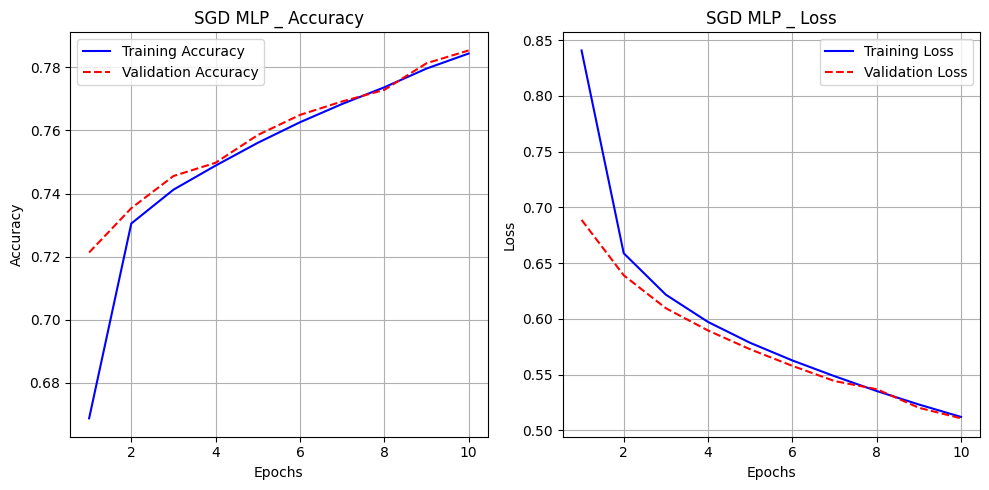

In [48]:
plot_learning_curves(history_SGD_mlp,title='SGD MLP')

**Reduce Learning Rate on Plateau**

In [49]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

In [50]:
Reduced_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(128,activation='relu'),
                     Dense(64,activation='relu'),
                     Dense(32,activation='relu'),
                     Dense(7,activation='softmax')])
Reduced_mlp.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
Reduced_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
history_Reduced_mlp=Reduced_mlp.fit(X_train,y_train,epochs=10,batch_size=256,
                                validation_split=0.2,verbose=1,callbacks=[reduce_lr])

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7371 - loss: 0.6171 - val_accuracy: 0.8044 - val_loss: 0.4629 - learning_rate: 0.0100
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8103 - loss: 0.4491 - val_accuracy: 0.8263 - val_loss: 0.4141 - learning_rate: 0.0100
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8329 - loss: 0.4009 - val_accuracy: 0.8331 - val_loss: 0.4032 - learning_rate: 0.0100
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8422 - loss: 0.3819 - val_accuracy: 0.8510 - val_loss: 0.3679 - learning_rate: 0.0100
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8537 - loss: 0.3604 - val_accuracy: 0.8534 - val_loss: 0.3622 - learning_rate: 0.0100
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8607 - loss: 0.3439 - val_accuracy: 0.8640 - val_loss: 0.3358 - learning_rate: 0.0100
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8644 

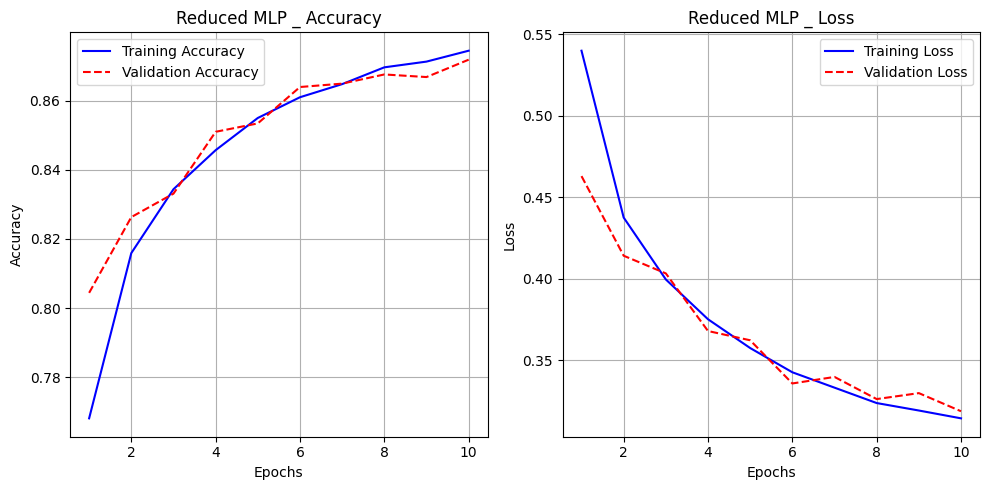

In [53]:
plot_learning_curves(history_Reduced_mlp,title='Reduced MLP')


***Summary - Optimizer and Learning Rate Strategy***

1.**RMSprop**The validation accuracy peaked just below 0.84 before fluctuating slightly.
Validation loss follows a steady downfall but fluctuates near 0.425. These fluctuations might indicate slight overfitting .

2.**SGD** outperformed.Validation accuracy improved steadily,matching training accuracy closely, the loss for both converged well without ending in a plateau.

3.**Reduced Learning Rate Plateau**: The validation accuracy closely follows the training curve, suggesting minimal overfitting.
Both training and validation loss decrease over epochs, stabilizing around 0.30.

---

##4.	Training Management

**Early Stopping**


In [54]:
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

In [55]:
Early_stop_mlp=Sequential([Input(shape=(X_train.shape[1],)),
                     Dense(128,activation='relu'),
                     Dense(64,activation='relu'),
                     Dense(32,activation='relu'),
                     Dense(7,activation='softmax')])
Early_stop_mlp.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
Early_stop_mlp.compile(optimizer=Adam(learning_rate=0.01),
                                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
history_Early_stop_mlp=Early_stop_mlp.fit(X_train,y_train,epochs=10,batch_size=256,
                                validation_split=0.2,verbose=1,callbacks=[early_stop])

Epoch 1/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8693 - loss: 0.3212 - val_accuracy: 0.8648 - val_loss: 0.3361
Epoch 2/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8727 - loss: 0.3113 - val_accuracy: 0.8720 - val_loss: 0.3127
Epoch 3/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8730 - loss: 0.3117 - val_accuracy: 0.8687 - val_loss: 0.3266
Epoch 4/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8735 - loss: 0.3126 - val_accuracy: 0.8723 - val_loss: 0.3155
Epoch 5/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8768 - loss: 0.3052 - val_accuracy: 0.8747 - val_loss: 0.3110
Epoch 6/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8770 - loss: 0.3048 - val_accuracy: 0.8772 - val_loss: 0.3123
Epoch 7/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8782 - loss: 0.3016 - val_accuracy: 0.8772 - val_loss: 0.3066
Epoch 8/10
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8804 - loss: 0.2961 - 

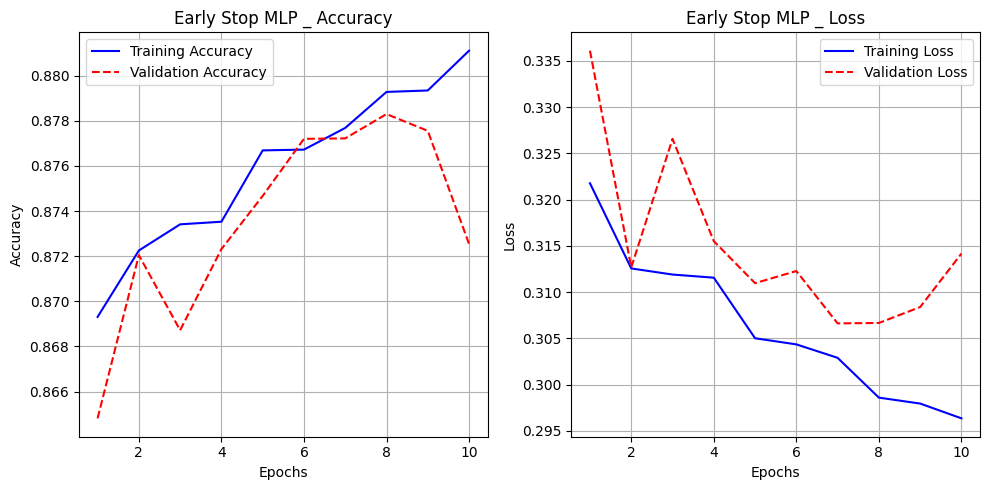

In [64]:
plot_learning_curves(history_Early_stop_mlp,title='Early Stop MLP')

***Summary-Early Stopping***

* Validation Accuracy  peaks around epoch 6 and then slightly declines—suggesting early stopping helped prevent excessive overfitting.
* Validation_loss plateaued between epoch 3 and 4,which in turn proves training was stopped to prevent overfitting.

##Model Evaluation

---

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

* Accuracy

In [70]:
models={'Deep MLP': Deep_mlp,
        'LeakyRelu MLP': leaky_mlp,
        'SELU MLP': SELU_mlp,
        'Batch Normalization': BN_mlp,
        'Dropout Regularization': dropout_model,
        'L2_Regularization': L2_mlp,
        'RMSprop Optimizer': Rms_mlp,
        'SGD Optimizer': SGD_mlp,
        'Reduced LR':Reduced_mlp,
        'Early stop MLP':Early_stop_mlp}
for name, model in models.items():
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'\n{name} Model Test Accuracy: {100* test_acc:.4f}%')
    print('--------------------------------------------------')


Deep MLP Model Test Accuracy: 87.4375%
--------------------------------------------------

LeakyRelu MLP Model Test Accuracy: 87.0640%
--------------------------------------------------

SELU MLP Model Test Accuracy: 83.1975%
--------------------------------------------------

Batch Normalization Model Test Accuracy: 89.3110%
--------------------------------------------------

Dropout Regularization Model Test Accuracy: 80.4876%
--------------------------------------------------

L2_Regularization Model Test Accuracy: 78.0367%
--------------------------------------------------

RMSprop Optimizer Model Test Accuracy: 83.3016%
--------------------------------------------------

SGD Optimizer Model Test Accuracy: 78.5823%
--------------------------------------------------

Reduced LR Model Test Accuracy: 86.9022%
--------------------------------------------------

Early stop MLP Model Test Accuracy: 87.6131%
--------------------------------------------------


* Classification Report

In [72]:
from sklearn.metrics import classification_report

for name, model in models.items():
    print(f"\nClassification Report for {name}")
    y_pred_probs = model.predict(X_test)

    y_pred = np.argmax(y_pred_probs, axis=1)


    print(classification_report(y_test, y_pred))


Classification Report for Deep MLP
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     42368
           1       0.87      0.92      0.90     56661
           2       0.83      0.86      0.84      7151
           3       0.89      0.55      0.68       549
           4       0.77      0.44      0.56      1899
           5       0.72      0.65      0.68      3473
           6       0.91      0.86      0.89      4102

    accuracy                           0.87    116203
   macro avg       0.84      0.73      0.78    116203
weighted avg       0.87      0.87      0.87    116203


Classification Report for LeakyRelu MLP
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     42368
           1       0.87      0.91      0.89     56661
           2       0.78      0.92      0.84      7151
           3       0.86

* Macro and Weighted F1 score

In [73]:
from sklearn.metrics import f1_score
summary = []

for name, model in models.items():
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    summary.append((name, macro_f1, weighted_f1))

# Print summary table
print("\n Summary of F1-scores:")
print(f"{'Model':<25}{'Macro F1':<15}{'Weighted F1'}")
for name, macro, weighted in summary:
    print(f"{name:<25}{macro:<15.4f}{weighted:.4f}")


3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

 Summary of F1-scores:
Model                    Macro F1       Weighted F1
Deep MLP                 0.7757         0.8726
LeakyRelu MLP            0.7801         0.8692
SELU MLP                 0.7096         0.8301
Batch Normalization      0.8229         0.8923
Dropout Regularization   0.5830         0.7968
L2_Regularization        0.5354         0.7710
RMSprop Optimizer        0.6123         0.8276
SGD Optimizer            0.5888         0.7778
Reduced LR               0.7768         0.8691
Early stop MLP           0.7933         0.8751


* Confusion Matrix

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


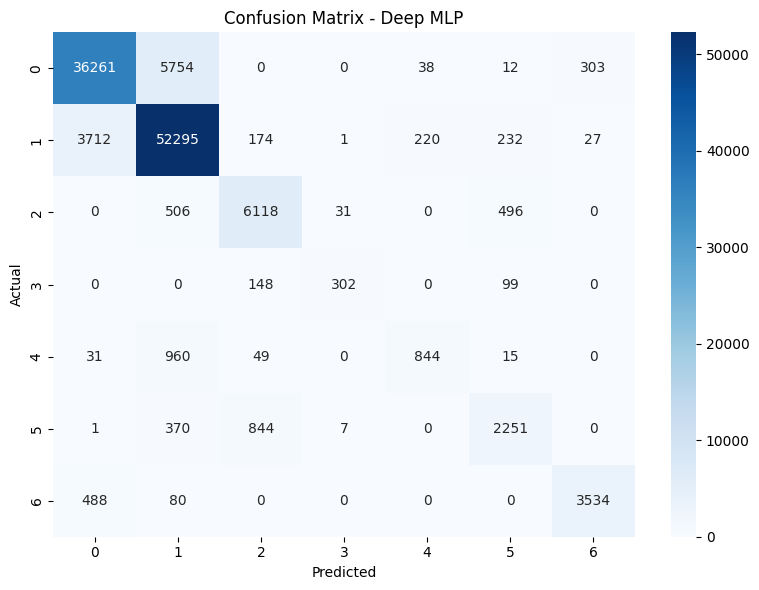

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


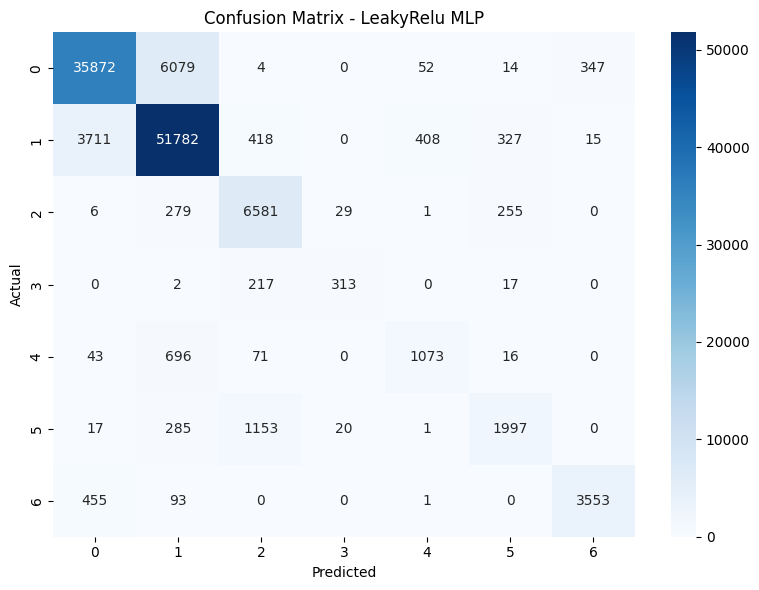

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


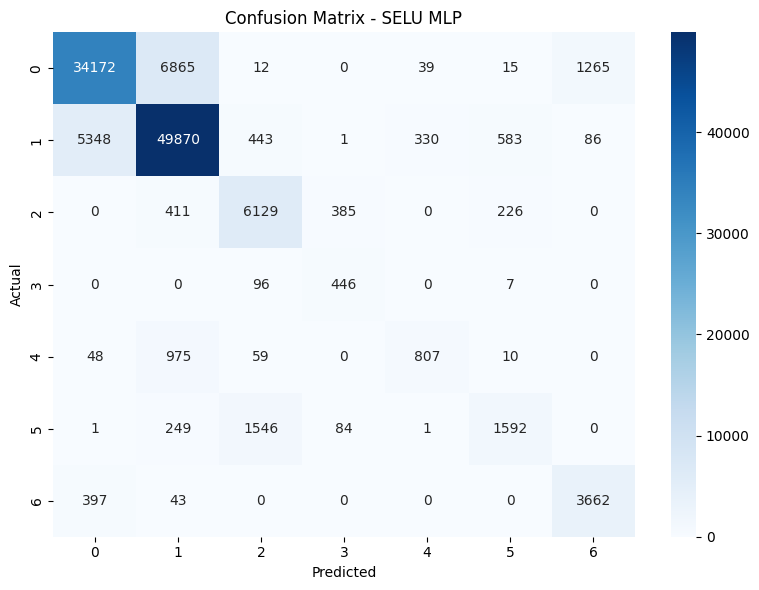

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


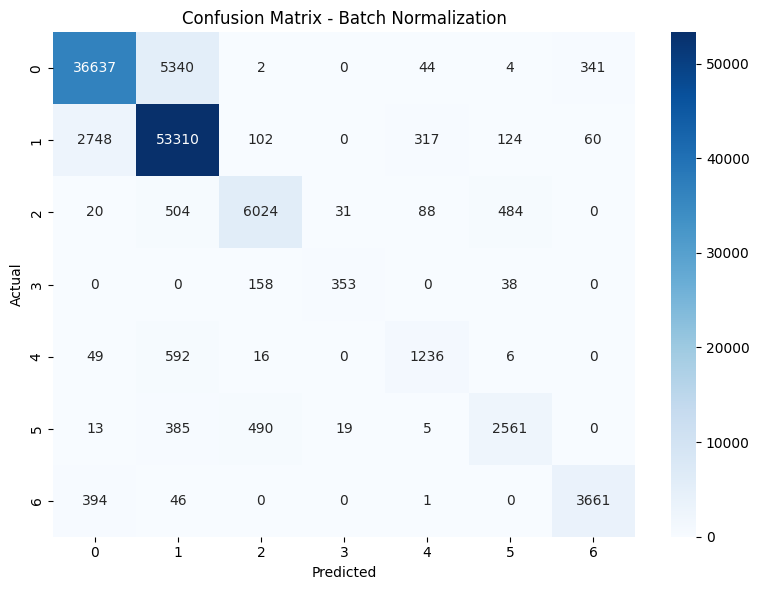

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


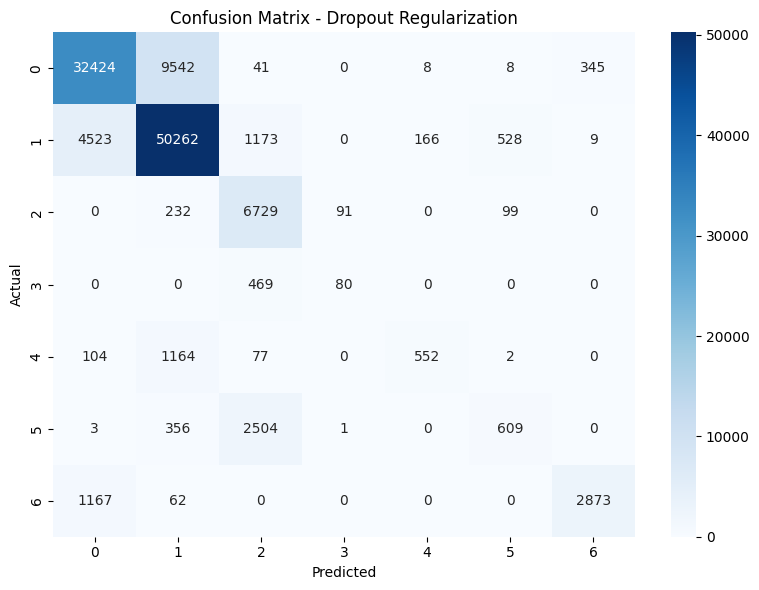

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


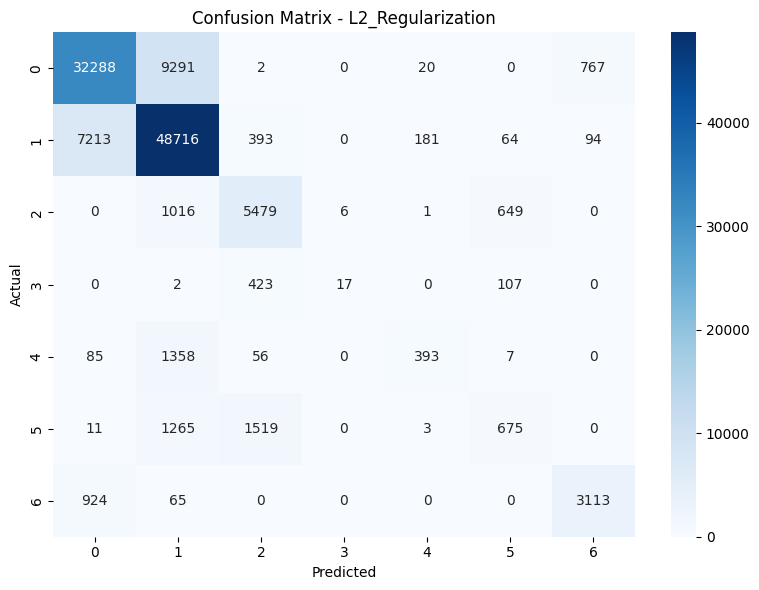

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


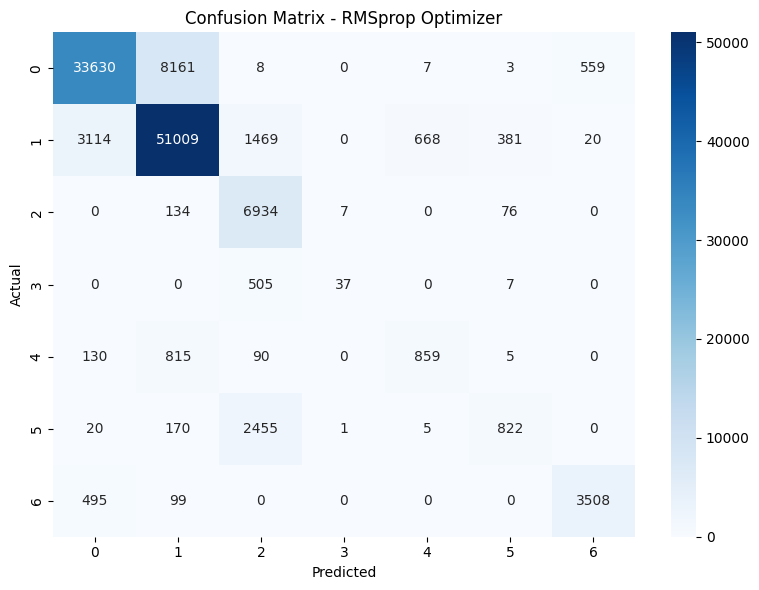

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


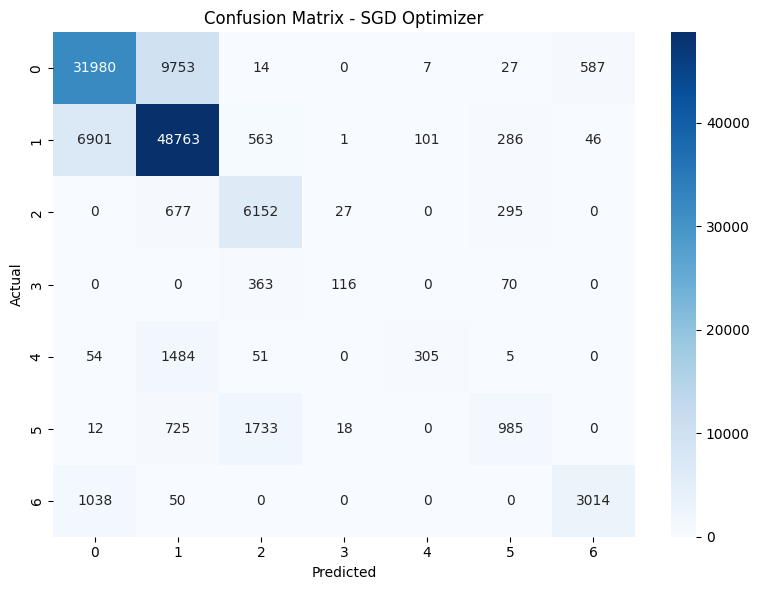

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


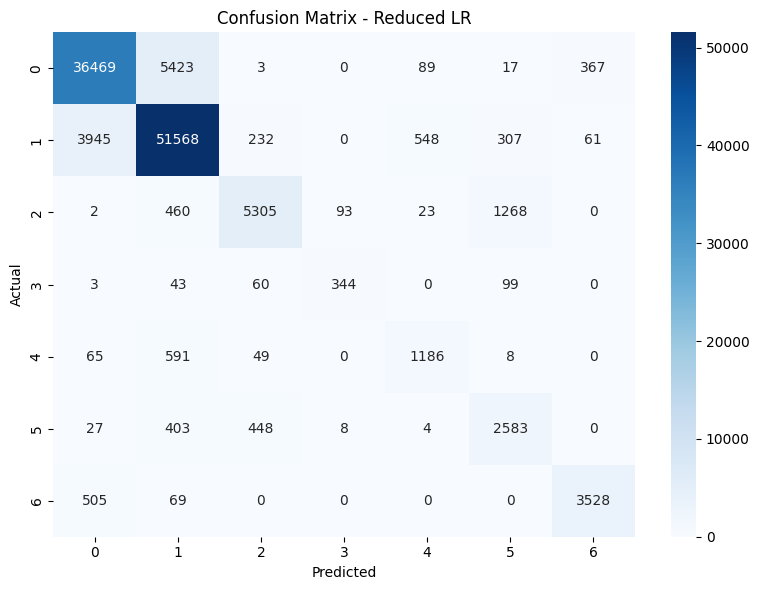

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


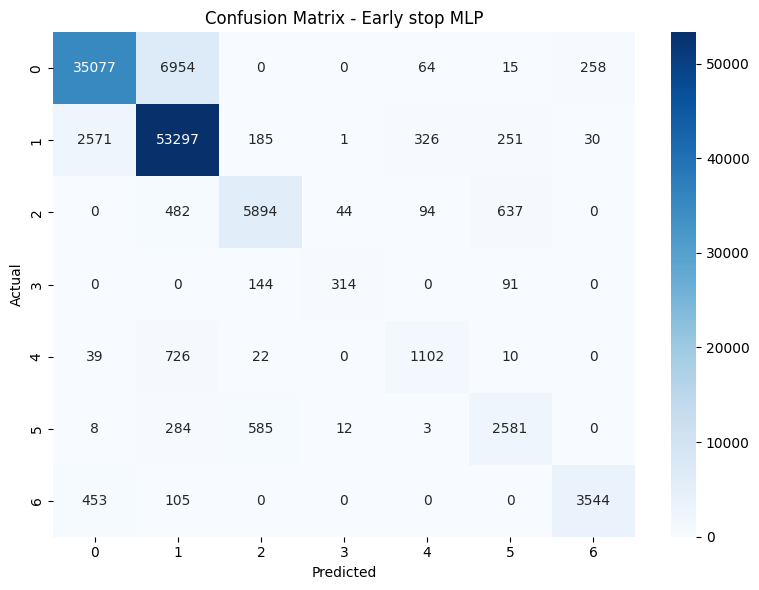

In [74]:
from sklearn.metrics import confusion_matrix
for name, model in models.items():

    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)


    cm = confusion_matrix(y_test, y_pred)
    labels = np.unique(y_test)

    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


#Ensemble Method

**Random Forest Classifier**




In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

In [76]:
rf_acc = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest Accuracy: {rf_acc*100:.2f}%")

Random Forest Accuracy: 95.33%


In [77]:
print("Classification Report:\n")
print(classification_report(y_test, y_rf_pred,digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     0.9630    0.9417    0.9523     42368
           1     0.9485    0.9726    0.9604     56661
           2     0.9395    0.9592    0.9492      7151
           3     0.9181    0.8579    0.8870       549
           4     0.9518    0.7688    0.8506      1899
           5     0.9278    0.8914    0.9093      3473
           6     0.9731    0.9451    0.9589      4102

    accuracy                         0.9533    116203
   macro avg     0.9460    0.9053    0.9240    116203
weighted avg     0.9534    0.9533    0.9530    116203



In [78]:
f1_weighted_rf = f1_score(y_test, y_rf_pred, average='weighted')
f1_macro_rf = f1_score(y_test, y_rf_pred, average='macro')

print(f"Random Forest Weighted F1-score: {f1_weighted_rf:.4f}")
print(f"Random Forest Macro F1-score: {f1_macro_rf:.4f}")


Random Forest Weighted F1-score: 0.9530
Random Forest Macro F1-score: 0.9240


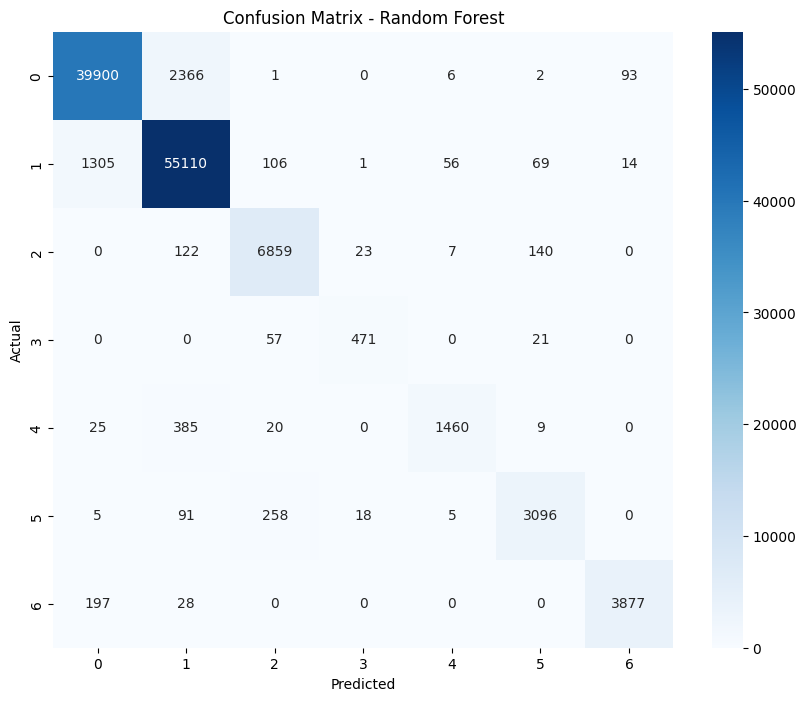

In [81]:
cm_rf = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Final Evaluation


---



1. The highest test accuracy was achieved by **Batch Normalization** method,probably because it helps stabalise learning by reducing covariate shift.

2. **Early stopping** performed slightly better and prevented overfitting.

3. **Reduced LR** , ** LeakyRELU** and **RMSprop** were moderate performers.RMSprop did worse than Adam.

4. **L2 Regularization** and **SGD Optimizer** performed poorly .

---

## Comparison with Ensemble Method

 **Random Forest model** achieved an impressive 95.33% test accuracy, significantly outperforming all other deep learning (MLP) models.
 Random Forest performs better than MLPs on structured datasets and is robust to outliers and irrelevant features without much preprocessing. Where-as MLPs require careful feature scaling, regularization, and architecture tuning.